In [2]:
import numpy as np
import pandas as pd
import nltk as nlt
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = "../../data/processed/nvidia_grouped_preprocessed/posts_by_month.json"

with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)

# Flatten into a single list of all posts
all_posts = []
for month, posts in json_data.items():
    all_posts.extend(posts)  # Combine all posts into one list

# Create DataFrame
df = pd.DataFrame(all_posts)


In [4]:
df.head()

,month,title,date,time,score,num_comments,flair,body,combined_text,comments
0,2025-04,game ready studio driver 57602 faqdiscussion,2025-04-16,17:47:13,589,2181,Discussion,game ready studio driver 57602 has been rele...,game ready studio driver 57602 faqdiscussion ...,[]
1,2025-04,tech support and question megathread april 20...,2025-04-01,10:45:43,6,29,Tech Support,were consolidating all tech support posts and ...,tech support and question megathread april 20...,[]
2,2025-04,rtx 5070 ti performance scaling 57602 vs 57283...,2025-04-19,01:35:23,348,89,Benchmarks,on the day of the release of the new nvidia dr...,rtx 5070 ti performance scaling 57602 vs 57283...,[]
3,2025-04,5090 storm trooper,2025-04-19,04:54:58,93,15,Build/Photos,this is my first time hard tubing and its been...,5090 storm trooper this is my first time hard ...,[]
4,2025-04,5090 astral lc,2025-04-18,21:01:07,210,116,Build/Photos,astral 5090 lc installed today using hwmonito...,5090 astral lc astral 5090 lc installed today ...,[]


# Score, commnet and flair Analysis

In [5]:
score = df["score"]
comments = df["num_comments"]


              score  num_comments
count    172.000000    172.000000
mean     741.133721    171.540698
std     2648.574888    427.994744
min        0.000000      0.000000
25%        0.000000      9.000000
50%        1.000000     50.500000
75%       48.500000    134.250000
max    17042.000000   3965.000000
Correlation (score vs. comments): 0.68


<Axes: xlabel='score', ylabel='num_comments'>

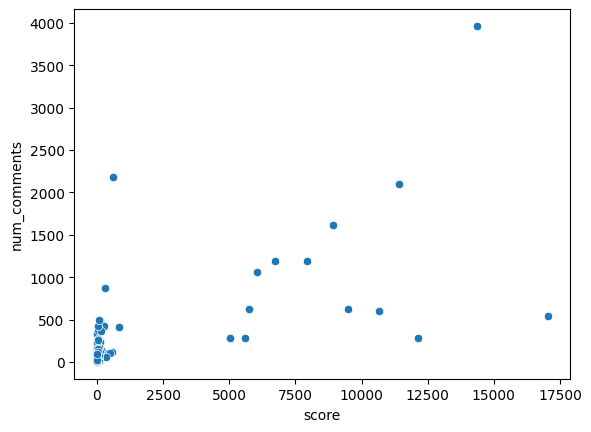

In [6]:
# Summary stats
print(df[['score', 'num_comments']].describe())

# Correlation between score and comments
correlation = df['score'].corr(df['num_comments'])
print(f"Correlation (score vs. comments): {correlation:.2f}")

sns.scatterplot(x='score', y='num_comments', data=df)

flair
Discussion                                   59
Question                                     38
Build/Photos                                 25
Benchmarks                                   18
Opinion                                      15
News                                          4
PSA                                           3
Meta                                          3
Tech Support                                  1
3rd Party Cable                               1
Gore                                          1
Blown Power Phases. Not 12VHPWR Connector     1
Rumor                                         1
Jensen Watch                                  1
MSI Responded                                 1
Name: count, dtype: int64
flair
3rd Party Cable                              14348.000000
Jensen Watch                                 12125.000000
Blown Power Phases. Not 12VHPWR Connector    11433.000000
MSI Responded                                 8915.000000
News      

<Axes: xlabel='flair'>

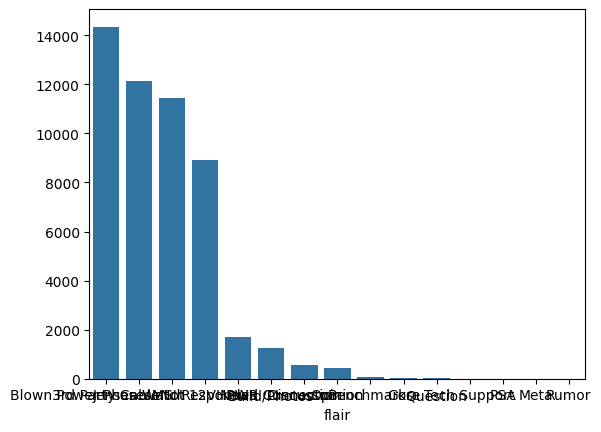

In [7]:
# Frequency of flairs
flair_counts = df['flair'].value_counts()
print(flair_counts)

# Compare average score by flair
flair_score = df.groupby('flair')['score'].mean().sort_values(ascending=False)
print(flair_score)

# Visualize
sns.barplot(x=flair_score.index, y=flair_score.values)

### Conclusion 
##### These things are utterly useless

# Text-Based Analysis

### Sentiment Analysis

In [8]:
text_body = df["combined_text"]
text_body.head()

0    game ready  studio driver 57602 faqdiscussion ...
1    tech support and question megathread  april 20...
2    rtx 5070 ti performance scaling 57602 vs 57283...
3    5090 storm trooper this is my first time hard ...
4    5090 astral lc astral 5090 lc installed today ...
Name: combined_text, dtype: object

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiments = []
for text in text_body:
    sentiment = analyzer.polarity_scores(text)
    sentiments.append(sentiment["compound"])

print(sentiments)
print(sum(sentiments))

[0.9463, 0.9957, 0.3182, 0.8063, 0.4372, 0.1406, 0.7968, 0.9186, 0.128, 0.631, 0.5994, 0.926, 0.5927, 0.8213, 0.296, 0.1027, 0.9118, 0.8916, 0.0, -0.34, 0.8765, 0.9339, -0.1779, 0.5994, 0.6249, 0.9062, -0.3875, 0.204, 0.5927, 0.9273, 0.8957, 0.7906, 0.935, 0.3365, 0.8608, 0.1796, 0.9001, 0.9455, 0.9545, 0.9575, 0.7121, 0.9337, -0.5812, 0.0, 0.9398, 0.3612, 0.671, 0.8828, 0.9201, -0.128, 0.9643, 0.0772, 0.8307, 0.9118, 0.7783, 0.0, -0.8959, 0.4884, 0.3182, 0.9423, 0.0828, 0.0, 0.5187, 0.3612, 0.4215, 0.4019, 0.6485, 0.8396, 0.0, 0.9118, 0.8201, 0.836, 0.9025, 0.974, 0.0, 0.8659, 0.7096, 0.7579, 0.6369, 0.9956, 0.1655, 0.0, 0.6808, 0.953, 0.5407, -0.4194, 0.411, 0.6369, 0.4201, 0.5859, 0.0057, 0.8078, -0.6428, 0.9368, 0.0, 0.8447, 0.6059, 0.9563, 0.8363, 0.9127, 0.4019, -0.5674, 0.6801, -0.8031, 0.4767, 0.7474, 0.5574, 0.1154, 0.6361, -0.5267, 0.3182, 0.6786, 0.0, -0.6985, 0.25, 0.9925, 0.872, -0.3612, -0.3182, 0.2382, -0.4588, 0.25, 0.7269, 0.5965, -0.0516, 0.8553, 0.9129, 0.8442, 0.273

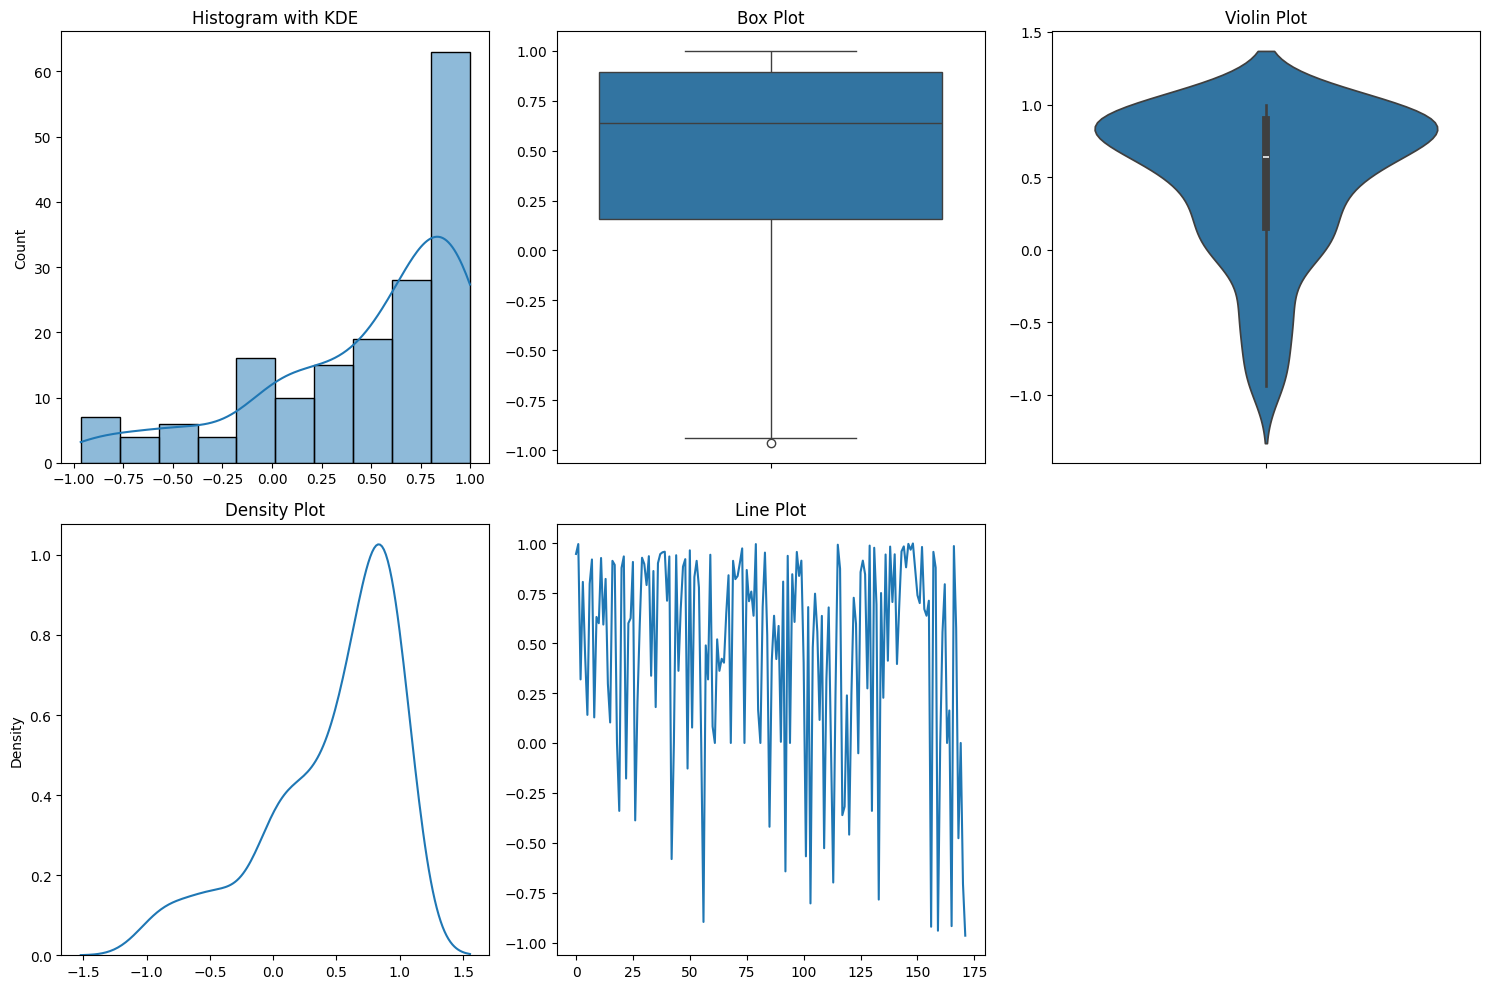

In [10]:
data = sentiments

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histogram
sns.histplot(data, bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram with KDE')

# Box plot
sns.boxplot(data=data, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot')

# Violin plot
sns.violinplot(data=data, ax=axes[0, 2])
axes[0, 2].set_title('Violin Plot')

# Density Plot
sns.kdeplot(data, ax=axes[1, 0])
axes[1, 0].set_title('Density Plot')

# Line Plot
sns.lineplot(x=range(len(data)), y=data, ax=axes[1, 1])
axes[1, 1].set_title('Line Plot')

# Empty plot (just to complete the 2x3 grid)
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### I see absolutely no good insight here, maybe data science is not for me

In [11]:
df["sentiment"] = sentiments

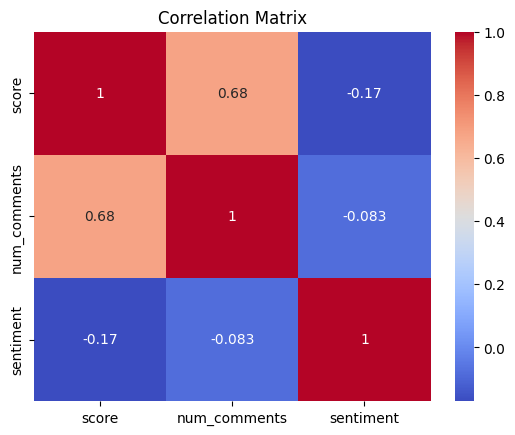

In [12]:
# Correlation matrix
corr_matrix = df[['score', 'num_comments', 'sentiment']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()